In [2]:
import pandas as pd
df=pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
x=df.drop('medv',axis=1)
y=df['medv']

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

model=Sequential([
    Input(shape=(x.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mse'
)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    patience=1,
    monitor='val_loss',
    verbose=1,
    restore_best_weights=True
)

In [39]:
history=model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 628.2405 - val_loss: 514.4399
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 620.3585 - val_loss: 481.5142
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 548.5037 - val_loss: 439.4831
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 517.5950 - val_loss: 382.2054
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 420.9233 - val_loss: 307.0111
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 341.4084 - val_loss: 215.5546
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 209.3399 - val_loss: 130.1432
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 143.4392 - val_loss: 73.3985
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82.5538 - val_loss: 49.6434
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58.3903 - val_loss: 38.8003
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46.5890 - val_loss: 32.0733
Epoch 12/100
13/13 ━━━━━━━

In [40]:
print(x.shape)

(506, 13)


In [41]:
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae , mean_squared_error as mse
print(r2(y_test,y_pred))
print(mae(y_test,y_pred))
print(mse(y_test,y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
0.8234185564039708
2.4566455317478555
12.949385294808003


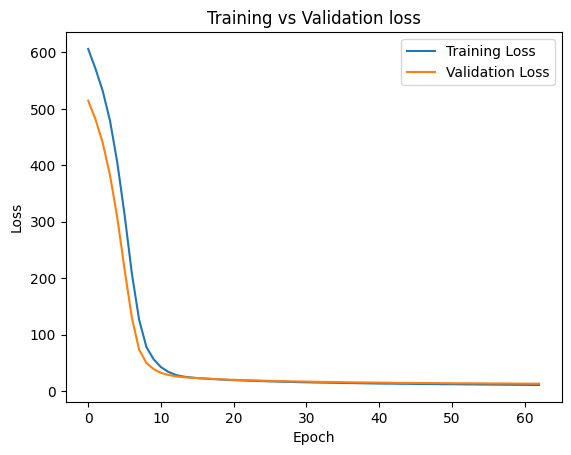

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Training vs Validation loss")
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend()
plt.show()